In [1]:
#from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
device = "cuda:0"

import matplotlib.pyplot as  plt

time_window = 250
batch_size = 256
dataset = 'shd'

DL = DatasetLoader(dataset=dataset, caching='disk', num_workers=0, batch_size=batch_size, time_window=time_window)
test_loader, train_loader = DL.get_dataloaders()

ckpt_dir = 'barridos_shd'

data = test_loader, train_loader

dropout = 0.2

import numpy as np

            

C:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#name = 'shd250_32x2_d_150_3_fs_88330078125'
#name = 'shd250_32x2_d_150_6_fs_8681640625'
#name = 'shd250_48x2_d_150_3_fs_90087890625'
#name = 'shd250_48x2_d_150_6_fs_9052734375'
#name = 'shd250_64x2_d_150_3_fs_8984375'
#name = 'shd250_64x2_d_150_6_fs_89013671875'
#name = 'shd250_128x2_d_150_3_fs_8671875'
name = 'shd250_128x2_d_150_6_fs_89453125'

accs = []
pr = [1, 5, 10, 15, 20, 25]
#pr = [1, 5, 10, 15, 20, 50]
for k in pr:
    snn_pooled = ModelLoader(name, 'shd_soa_baselines', batch_size, 'cuda:0')
    snn_pooled.epoch = 999
    snn_pooled.pool_delays('ho', k=k)
    snn_pooled.test(test_loader, dropout = dropout)  
    accs.append(snn_pooled.acc[-1][1])

delays: [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
Test Loss: 3.2299138137272427
Avg spk_count per neuron for all 250 timesteps 2.957073211669922
Test Accuracy of the model on the test samples: 19.092
delays: [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
Test Loss: 1.2843376057488578
Avg spk_count per neuron for all 250 timesteps 5.32252311706543
Test Accuracy of the model on the test samples: 62.842
delays: [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
Test Loss: 0.5210770453725543
Avg spk_count per neuron for all 250 timesteps 7.006505966186523
Test Accuracy of the model on the test samples: 85.645

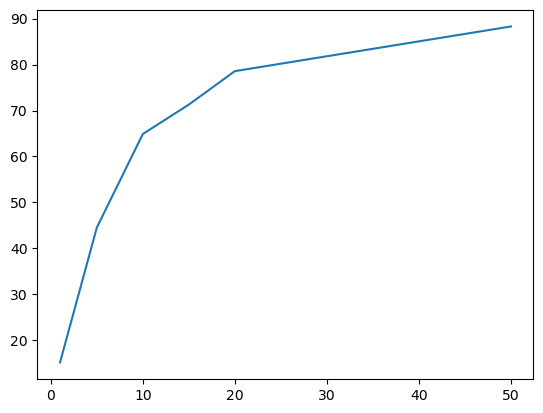

In [16]:
plt.plot(pr, accs)